In [0]:
# Makes plots / images embedded in the file
%matplotlib inline

In [0]:
from zipfile import ZipFile
from urllib.request import urlopen
import numpy as np

URL = 'https://uwmadison-cs534-term-project-f2018-cdh.github.io/assets/datasets/items.zip'

url = urlopen(URL)
output = open('items.zip','wb')
output.write(url.read())
output.close()

zip_ref = ZipFile('items.zip', 'r')
zip_ref.extractall('./dataset')
zip_ref.close()

In [0]:
# Import data and keras layers

from keras import backend as k
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, UpSampling2D, Dense, Reshape
from keras.layers import Flatten, Dropout, BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

In [0]:
import os

files = os.listdir('./dataset/items')
for name in files:
    print(name)

items_image.npy
items_label.npy


In [0]:
x1_raw = np.load('./dataset/items/items_image.npy')
y1_raw = np.load('./dataset/items/items_label.npy')

x1_test = np.array([])
y1_test = np.array([])

#Optimizer
adam = Adam(lr=2e-4, beta_1=0.5)

In [0]:
filterLbls = ['items_weapon','items_weapons','items_weapon_ranged','items_weapon_artefact']
#'items_wand','items_staff','items_rod'

y1_train = []

firstTime = True
for i in range(y1_raw.shape[0]):
  
  if y1_raw[i] in filterLbls:
    y1_train.append(y1_raw[i])
    
    if firstTime:
      firstTime = False
      raw = x1_raw[i,:,:,:]
      x1_train = np.reshape(raw,(1,raw.shape[0],raw.shape[1],raw.shape[2]))
    else:
      raw = x1_raw[i,:,:,:]
      raw = np.reshape(raw,(1,raw.shape[0],raw.shape[1],raw.shape[2]))
      x1_train = np.concatenate((x1_train,raw), axis=0)
    
y1_train = np.array(y1_train)


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  featurewise_center = True,
  featurewise_std_normalization = True,
  rotation_range = 60,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range = 0.2,
  zoom_range = 0.2
)

datagen.fit(x1_train)

In [0]:
# Creating the generator
generator = Sequential()
generator.add(Dense(128*8*8, input_dim = 100))
generator.add(Activation('relu'))
generator.add(BatchNormalization())
generator.add(Reshape((8, 8, 128)))
generator.add(UpSampling2D((2,2)))
generator.add(Conv2D(64, kernel_size = (5, 5), padding = 'same'))
generator.add(Activation('relu'))
generator.add(BatchNormalization())
generator.add(UpSampling2D((2,2)))
generator.add(Conv2D(4, kernel_size = (5, 5), padding = 'same'))
generator.add(Activation('tanh'))

print(generator.summary())
generator.compile(loss = 'binary_crossentropy', optimizer = adam)  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8192)              827392    
_________________________________________________________________
activation_8 (Activation)    (None, 8192)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 8192)              32768     
_________________________________________________________________
reshape_3 (Reshape)          (None, 8, 8, 128)         0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        204864    
_________________________________________________________________
activation_9 (Activation)    (None, 16, 16, 64)        0         
__________

In [0]:
# Creating the discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size = (5, 5), strides = (2, 2), padding = 'same', input_shape = (32, 32, 4)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(128, kernel_size = (5, 5), strides = (2, 2), padding = 'same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1, activation = 'sigmoid'))
print(discriminator.summary())
discriminator.compile(loss = 'binary_crossentropy', optimizer = adam) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 16, 16, 64)        6464      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 8193      
Total para

In [0]:
# Create the GAN
discriminator.trainable = False
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss = 'binary_crossentropy', optimizer = adam)

In [0]:
# Visualize generated data
def plotGeneratedImages():
  generated_images = generator.predict(noise)
  fig = plt.figure(figsize=(9, 9))        
  for i in range(9 if generated_images.shape[0] > 9 else generated_images.shape[0]):
    plt.subplot(3, 3, i+1)
    img = np.clip(generated_images[i, :],0,1)
    img = img.reshape((32, 32, 4))
    plt.tight_layout()
    plt.imshow(img)
    plt.axis('off')


 13%|█▎        | 4/31 [00:00<00:01, 19.32it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 26%|██▌       | 8/31 [00:00<00:01, 19.00it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 32%|███▏      | 10/31 [00:00<00:01, 18.72it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 48%|████▊     | 15/31 [00:00<00:00, 19.15it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 61%|██████▏   | 19/31 [00:00<00:00, 19.03it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 74%|███████▍  | 23/31 [00:01<00:00, 19.33it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 87%|████████▋ | 27/31 [00:01<00:00, 19.39it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



100%|██████████| 31/31 [00:01<00:00, 19.41it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 13%|█▎        | 4/31 [00:00<00:01, 17.86it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 26%|██▌       | 8/31 [00:00<00:01, 18.22it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 39%|███▊      | 12/31 [00:00<00:01, 18.21it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 52%|█████▏    | 16/31 [00:00<00:00, 18.36it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 65%|██████▍   | 20/31 [00:01<00:00, 18.04it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 77%|███████▋  | 24/31 [00:01<00:00, 18.23it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 90%|█████████ | 28/31 [00:01<00:00, 18.36it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  0%|          | 0/31 [00:00<?, ?it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 13%|█▎        | 4/31 [00:00<00:01, 18.40it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 32%|███▏      | 10/31 [00:00<00:01, 18.47it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 45%|████▌     | 14/31 [00:00<00:00, 18.20it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 52%|█████▏    | 16/31 [00:00<00:00, 17.79it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 71%|███████   | 22/31 [00:01<00:00, 18.02it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 77%|███████▋  | 24/31 [00:01<00:00, 17.78it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 97%|█████████▋| 30/31 [00:01<00:00, 18.35it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 10%|▉         | 3/31 [00:00<00:01, 20.72it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 23%|██▎       | 7/31 [00:00<00:01, 19.40it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 29%|██▉       | 9/31 [00:00<00:01, 18.62it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 48%|████▊     | 15/31 [00:00<00:00, 18.23it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 61%|██████▏   | 19/31 [00:01<00:00, 18.14it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 74%|███████▍  | 23/31 [00:01<00:00, 18.24it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 87%|████████▋ | 27/31 [00:01<00:00, 18.13it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 94%|█████████▎| 29/31 [00:01<00:00, 17.90it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



100%|██████████| 31/31 [00:01<00:00, 17.74it/s]

 13%|█▎        | 4/31 [00:00<00:01, 18.60it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 26%|██▌       | 8/31 [00:00<00:01, 18.43it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 39%|███▊      | 12/31 [00:00<00:01, 18.41it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 52%|█████▏    | 16/31 [00:00<00:00, 18.46it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 58%|█████▊    | 18/31 [00:00<00:00, 17.91it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 71%|███████   | 22/31 [00:01<00:00, 17.98it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 84%|████████▍ | 26/31 [00:01<00:00, 17.95it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  0%|          | 0/31 [00:00<?, ?it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 13%|█▎        | 4/31 [00:00<00:01, 17.80it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 26%|██▌       | 8/31 [00:00<00:01, 17.98it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 39%|███▊      | 12/31 [00:00<00:01, 17.97it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 52%|█████▏    | 16/31 [00:00<00:00, 18.06it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 65%|██████▍   | 20/31 [00:01<00:00, 18.24it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 77%|███████▋  | 24/31 [00:01<00:00, 17.81it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 90%|█████████ | 28/31 [00:01<00:00, 18.09it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  0%|          | 0/31 [00:00<?, ?it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 13%|█▎        | 4/31 [00:00<00:01, 19.33it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 26%|██▌       | 8/31 [00:00<00:01, 18.55it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 39%|███▊      | 12/31 [00:00<00:01, 17.93it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 58%|█████▊    | 18/31 [00:00<00:00, 18.14it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 71%|███████   | 22/31 [00:01<00:00, 18.13it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 84%|████████▍ | 26/31 [00:01<00:00, 18.17it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 90%|█████████ | 28/31 [00:01<00:00, 18.00it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  6%|▋         | 2/31 [00:00<00:01, 18.76it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 19%|█▉        | 6/31 [00:00<00:01, 18.62it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 32%|███▏      | 10/31 [00:00<00:01, 18.62it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 45%|████▌     | 14/31 [00:00<00:00, 18.40it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 58%|█████▊    | 18/31 [00:00<00:00, 18.05it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 71%|███████   | 22/31 [00:01<00:00, 18.43it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 84%|████████▍ | 26/31 [00:01<00:00, 18.18it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 97%|█████████▋| 30/31 [00:01<00:00, 18.29it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 13%|█▎        | 4/31 [00:00<00:01, 18.55it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 19%|█▉        | 6/31 [00:00<00:01, 18.23it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 39%|███▊      | 12/31 [00:00<00:01, 18.29it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 45%|████▌     | 14/31 [00:00<00:00, 18.24it/s]


(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)


 65%|██████▍   | 20/31 [00:01<00:00, 18.34it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 71%|███████   | 22/31 [00:01<00:00, 17.80it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 90%|█████████ | 28/31 [00:01<00:00, 18.30it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  0%|          | 0/31 [00:00<?, ?it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 13%|█▎        | 4/31 [00:00<00:01, 18.74it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 26%|██▌       | 8/31 [00:00<00:01, 18.51it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 39%|███▊      | 12/31 [00:00<00:01, 18.14it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 52%|█████▏    | 16/31 [00:00<00:00, 18.32it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 65%|██████▍   | 20/31 [00:01<00:00, 18.34it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 77%|███████▋  | 24/31 [00:01<00:00, 18.41it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 90%|█████████ | 28/31 [00:01<00:00, 18.40it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  0%|          | 0/31 [00:00<?, ?it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 19%|█▉        | 6/31 [00:00<00:01, 18.52it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 32%|███▏      | 10/31 [00:00<00:01, 18.46it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 45%|████▌     | 14/31 [00:00<00:00, 18.36it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 52%|█████▏    | 16/31 [00:00<00:00, 17.85it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 71%|███████   | 22/31 [00:01<00:00, 18.49it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 84%|████████▍ | 26/31 [00:01<00:00, 18.67it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 97%|█████████▋| 30/31 [00:01<00:00, 18.45it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  6%|▋         | 2/31 [00:00<00:01, 18.79it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 19%|█▉        | 6/31 [00:00<00:01, 18.10it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 32%|███▏      | 10/31 [00:00<00:01, 18.33it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 45%|████▌     | 14/31 [00:00<00:00, 18.27it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 58%|█████▊    | 18/31 [00:00<00:00, 18.42it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 71%|███████   | 22/31 [00:01<00:00, 18.27it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 84%|████████▍ | 26/31 [00:01<00:00, 18.39it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 97%|█████████▋| 30/31 [00:01<00:00, 18.47it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  6%|▋         | 2/31 [00:00<00:01, 17.75it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 19%|█▉        | 6/31 [00:00<00:01, 17.87it/s]


(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)


 32%|███▏      | 10/31 [00:00<00:01, 17.43it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 52%|█████▏    | 16/31 [00:00<00:00, 18.27it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 65%|██████▍   | 20/31 [00:01<00:00, 18.46it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 77%|███████▋  | 24/31 [00:01<00:00, 18.49it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 84%|████████▍ | 26/31 [00:01<00:00, 18.17it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  0%|          | 0/31 [00:00<?, ?it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 13%|█▎        | 4/31 [00:00<00:01, 17.98it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 26%|██▌       | 8/31 [00:00<00:01, 18.31it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 39%|███▊      | 12/31 [00:00<00:01, 18.18it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 52%|█████▏    | 16/31 [00:00<00:00, 18.11it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 65%|██████▍   | 20/31 [00:01<00:00, 18.35it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 77%|███████▋  | 24/31 [00:01<00:00, 18.11it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 90%|█████████ | 28/31 [00:01<00:00, 18.32it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  0%|          | 0/31 [00:00<?, ?it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 13%|█▎        | 4/31 [00:00<00:01, 18.17it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 32%|███▏      | 10/31 [00:00<00:01, 18.25it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 45%|████▌     | 14/31 [00:00<00:00, 18.48it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 58%|█████▊    | 18/31 [00:00<00:00, 18.36it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 71%|███████   | 22/31 [00:01<00:00, 18.34it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 84%|████████▍ | 26/31 [00:01<00:00, 18.10it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 97%|█████████▋| 30/31 [00:01<00:00, 18.31it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  6%|▋         | 2/31 [00:00<00:01, 18.50it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 19%|█▉        | 6/31 [00:00<00:01, 18.08it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 32%|███▏      | 10/31 [00:00<00:01, 18.22it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 45%|████▌     | 14/31 [00:00<00:00, 18.32it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 58%|█████▊    | 18/31 [00:00<00:00, 18.01it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 71%|███████   | 22/31 [00:01<00:00, 18.02it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 84%|████████▍ | 26/31 [00:01<00:00, 18.21it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 97%|█████████▋| 30/31 [00:01<00:00, 17.87it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 13%|█▎        | 4/31 [00:00<00:01, 18.30it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 26%|██▌       | 8/31 [00:00<00:01, 18.17it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 39%|███▊      | 12/31 [00:00<00:01, 18.22it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 45%|████▌     | 14/31 [00:00<00:00, 18.13it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 65%|██████▍   | 20/31 [00:01<00:00, 18.21it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 77%|███████▋  | 24/31 [00:01<00:00, 18.28it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 90%|█████████ | 28/31 [00:01<00:00, 18.41it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  0%|          | 0/31 [00:00<?, ?it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 13%|█▎        | 4/31 [00:00<00:01, 18.71it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 26%|██▌       | 8/31 [00:00<00:01, 18.56it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 39%|███▊      | 12/31 [00:00<00:01, 18.58it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 52%|█████▏    | 16/31 [00:00<00:00, 18.57it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 65%|██████▍   | 20/31 [00:01<00:00, 18.53it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 77%|███████▋  | 24/31 [00:01<00:00, 18.33it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 90%|█████████ | 28/31 [00:01<00:00, 18.32it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  0%|          | 0/31 [00:00<?, ?it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 13%|█▎        | 4/31 [00:00<00:01, 18.27it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 26%|██▌       | 8/31 [00:00<00:01, 18.26it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 39%|███▊      | 12/31 [00:00<00:01, 17.95it/s]


(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)


 58%|█████▊    | 18/31 [00:01<00:00, 18.18it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 71%|███████   | 22/31 [00:01<00:00, 18.22it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 84%|████████▍ | 26/31 [00:01<00:00, 18.31it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 90%|█████████ | 28/31 [00:01<00:00, 17.73it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



  6%|▋         | 2/31 [00:00<00:01, 19.16it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 19%|█▉        | 6/31 [00:00<00:01, 18.88it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 32%|███▏      | 10/31 [00:00<00:01, 18.61it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 45%|████▌     | 14/31 [00:00<00:00, 18.55it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 58%|█████▊    | 18/31 [00:00<00:00, 17.81it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(15, 32, 32, 4)



 71%|███████   | 22/31 [00:01<00:00, 18.09it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 84%|████████▍ | 26/31 [00:01<00:00, 18.07it/s]

(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)



 97%|█████████▋| 30/31 [00:01<00:00, 18.43it/s]


(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)
(16, 32, 32, 4)


100%|██████████| 31/31 [00:01<00:00, 18.20it/s]

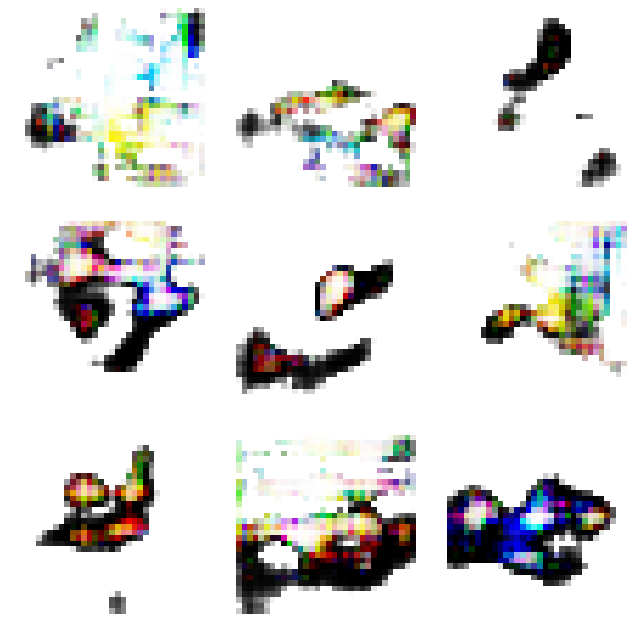

In [0]:
epochs = 20
batch_size = 16

batch_count = int(x1_train.shape[0] / batch_size)

iterator = datagen.flow(x1_train, batch_size=batch_size)

for epoch in range(epochs):

    for index in tqdm(range(batch_count)):
        
        # Real images
        #image_batch = x1_train[index * batch_size: (index + 1) * batch_size]
        image_batch = iterator.next()
        
        # Get initial random input for generator
        noise = np.random.uniform(-1, 1, size=[batch_size, 100])
        # Generating images
        generated_data = generator.predict_on_batch(noise)

        X = np.concatenate([generated_data, image_batch])
        y = np.zeros(batch_size + image_batch.shape[0])
        y[:image_batch.shape[0]] = 1

        # Train discriminator
        discriminator.trainable = True
        discriminator.train_on_batch(x=X, y=y)

        # Train generator 
        y = np.zeros(batch_size)
        discriminator.trainable = False
        gan.train_on_batch(x=noise, y=y)
        
        img = generated_images = generator.predict(noise)   
        
    
plotGeneratedImages()


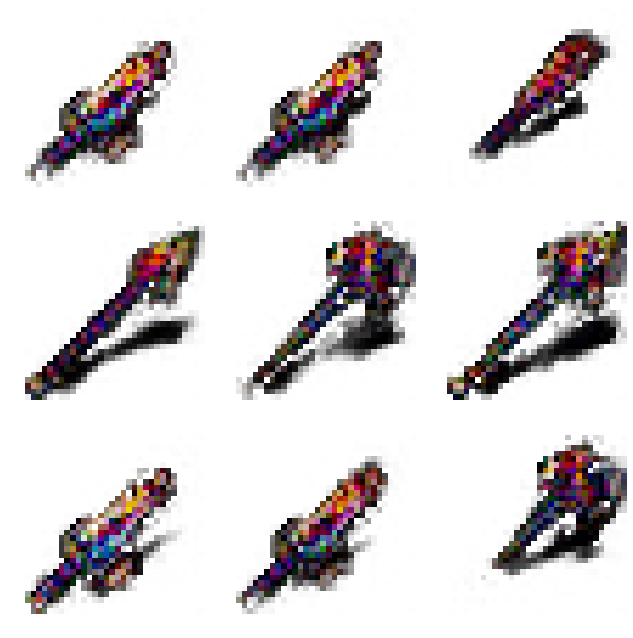

In [0]:
noise = np.random.uniform(-1, 1, size=[9, 100])
plotGeneratedImages()

In [0]:
from google.colab import files
import matplotlib.image as mpimg
import uuid

images = 20
noise = np.random.uniform(-1, 1, size=[images, 100])
generated_images = generator.predict(noise)    
for i in range(images):
  name = str(uuid.uuid4().hex) + '.png'
  img = np.reshape(np.clip(generated_images[i, :],0,1),(32, 32, 4))
  mpimg.imsave(name, img)             
  files.download(name)
